In [834]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [835]:
# 1 samples
def predict(theta,x):
    return np.dot(theta.T,x)

def compute_loss(y_hat,y):
    return (y_hat-y)**2

def compute_gradient(x,y_hat,y):
    k = y_hat-y
    return 2*x*k

def update(theta,lr,gradient):
    return theta - lr*gradient

In [836]:
# [1 x]
x = np.array([1,3.5])
# [b w]
theta = np.array([0.2,0.4])
lr = 0.01

y = 4.6

y_hat = predict(x,theta)
print(y_hat)

loss = compute_loss(y_hat,y)
print(loss)

gradient = compute_gradient(x,y_hat,y)
print(gradient)

#[b w]
theta = update(theta,lr,gradient)
print(theta)

1.6
8.999999999999998
[ -6. -21.]
[0.26 0.61]


In [837]:
data = np.genfromtxt('data.csv',delimiter=',')
N = 4

areas = data[:,0].reshape(N,1)
prices = data[:,1].reshape(N,)
print('areas: \n',areas)
print('\n prices: \n',prices)

areas: 
 [[6.7]
 [4.6]
 [3.5]
 [5.5]]

 prices: 
 [9.1 5.9 4.6 6.7]


In [838]:
feature = np.hstack([np.ones((N,1)),areas])
feature

array([[1. , 6.7],
       [1. , 4.6],
       [1. , 3.5],
       [1. , 5.5]])

In [839]:
lr = 0.01
epoch = 10
losses = []
theta = np.array([0.049,-0.34])

for i in range(epoch):
    for j in range(N):
        x = feature[j,:]
        y = prices[j]
        
        y_hat = predict(theta,x)
        loss = compute_loss(y_hat,y)
        losses.append(loss)
        gradient = compute_gradient(x,y_hat,y)
        theta = update(theta,lr,gradient)

print(theta)
        

[0.2335058  1.21100306]


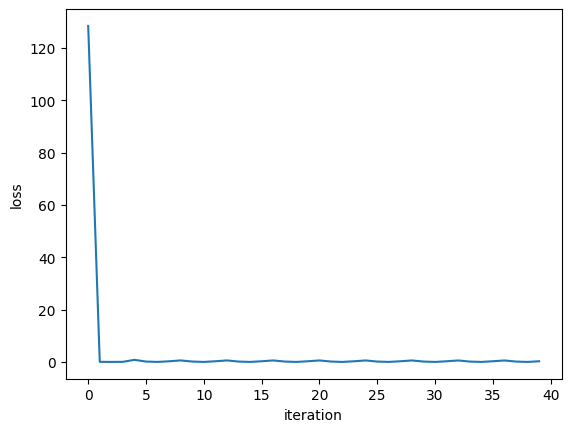

In [840]:
plt.plot(losses) 
plt.xlabel('iteration')
plt.ylabel('loss')
plt.show()

In [841]:
# m sample

x = np.array([[6.7 , 4.6],[1 , 1]])
y = np.array([9.1,5.9])
theta = np.array([-0.34,0.049])

In [863]:
def predict(theta,x):
    return np.dot(theta.T,x)

def compute_loss(y_hat,y,m):
    return (1/m)*(y_hat-y).T.dot((y_hat-y))

def compute_gradient(x, y, y_hat,m):
    k = 2*(y_hat - y)
    return x.dot(k.T) / m

def update(theta,lr,gradient):
    return theta - lr*gradient

In [843]:
y_hat = predict(theta,x)
y_hat

array([-2.229, -1.515])

In [844]:
loss = compute_loss(y_hat,y)
print(loss)

183.32846600000005


In [845]:
gradient = compute_gradient(x,y,y_hat)
print('gradient:\n',gradient)
print(gradient.shape)


gradient:
 [-220.0266  -37.488 ]
(2,)


In [846]:
theta = update(theta,lr/2,gradient)
print(theta)


[0.760133 0.23644 ]


In [864]:
data = np.genfromtxt('data.csv',delimiter=',')
areas = data[:,0:1]
prices = data[:,1:]
N = areas.size
print('areas: \n',areas)
print('\n prices: \n',prices)

areas: 
 [[6.7]
 [4.6]
 [3.5]
 [5.5]]

 prices: 
 [[9.1]
 [5.9]
 [4.6]
 [6.7]]


In [865]:
feature = np.hstack([areas, np.ones((N,1))])
theta = np.array([[-0.34], 
                  [0.049]])
feature

array([[6.7, 1. ],
       [4.6, 1. ],
       [3.5, 1. ],
       [5.5, 1. ]])

In [866]:
epoch = 20
lr = 0.01
m = 2
losses = []

for i in range(epoch):
    for j in range(0,N,m):
        x = feature[j:j+m,:]
        y = prices[j:j+m,:]
        
        y_hat = predict(theta,x)
        
        loss = compute_loss(y_hat,y,m)
        losses.append(loss[0][0])
        
        gradient = compute_gradient(x,y,y_hat,m)
        
        theta = update(theta,lr,gradient)
theta
        

array([[1.20018285, 0.27345987],
       [0.31753131, 1.17804306]])

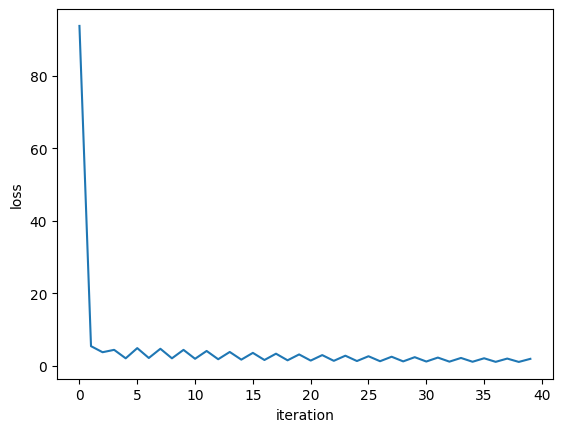

In [867]:
plt.plot(losses) 
plt.xlabel('iteration')
plt.ylabel('loss')
plt.show()

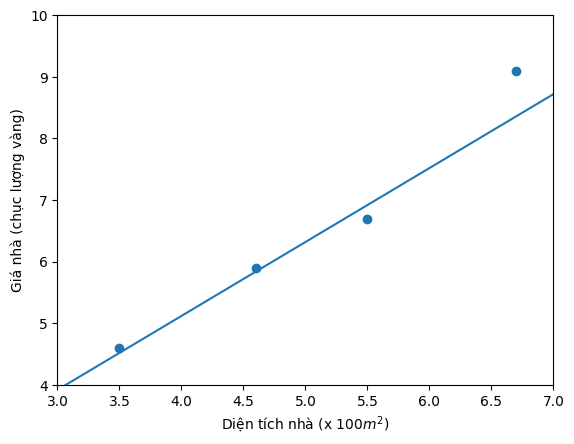

In [868]:
x_data = range(2, 8)
y_data = [x*theta[0] + theta[1] for x in x_data]
plt.plot(x_data, y_data)
#--------------------------------------
plt.scatter(areas, prices)

plt.xlabel('Diện tích nhà (x 100$m^2$)')
plt.ylabel('Giá nhà (chục lượng vàng)')

plt.xlim(3,7)
plt.ylim(4,10)
plt.show()

In [852]:
data   = np.genfromtxt('data.csv', delimiter=',')
areas  = data[:,0:1]
prices = data[:,1:]
N = areas.size

# vector [x, b]
data = np.hstack([areas, np.ones((N,1))])

 # [w, b]
theta = np.array([[-0.34], 
                  [0.049]])

In [853]:
# params
lr = 0.01
epoch_max = 20
m = 2 

# logging
losses = [] 

for epoch in range(epoch_max):
    for i in range(0, N, m):
        # get m samples
        x = data[i:i+m, :]
        y = prices[i:i+m, :]
        
        # predict y_hat
        y_hat = x.dot(theta)
                     
        # compute loss
        #loss = np.multiply((y_hat-y), (y_hat-y))
        #losses.append(np.mean(loss))
        loss = (1/m)*(y_hat-y).T.dot((y_hat-y))
        losses.append(loss[0][0])
        
        # compute gradient
        k = 2*(y_hat-y)
        gradients = x.T.dot(k) / m

        # update weights
        theta = theta - lr*gradients

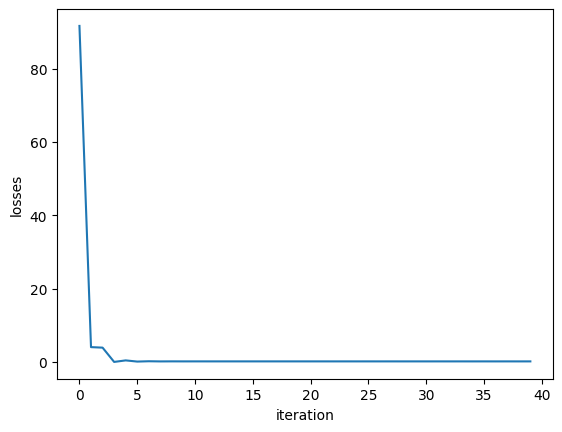

In [854]:
plt.plot(losses)
plt.xlabel('iteration')
plt.ylabel('losses')
plt.show()